<a href="https://colab.research.google.com/github/AhmadSabbirChowdhury/Cats-Vs-Dogs-Classification-Kaggle-Problem-Set-/blob/master/Cats_Vs_Dogs_Classification_(Kaggle_Problem).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.environ['KAGGLE_USERNAME'] = "ahmadsabbirchy" #username from the json file
os.environ['KAGGLE_KEY'] = "68d753b32f4227a54dc815f1e7abe9cd" #key from the json file 
!kaggle competitions download -c dogs-vs-cats #api copied from kaggle

100% 543M/543M [00:05<00:00, 132MB/s]

 92% 250M/271M [00:04<00:00, 54.2MB/s]
100% 271M/271M [00:04<00:00, 58.1MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 76.0MB/s]


In [2]:
#Upload the data by extracting from the train file
from zipfile import ZipFile

file_name = '/content/train.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Extraction Complete")

Extraction Complete


In [7]:
data_dir_list = os.listdir('/content/train')
#print(data_dir_list)

path, dirs, files = next(os.walk("/content/train")) #allows us to generate file names
file_count = len(files)
print(file_count)

original_dataset_dir = '/content/train'
base_dir = '/content/cats_and_dogs_small' #making a copy folder for train data
os.mkdir(base_dir)

25000


FileExistsError: ignored

In [0]:
#from main folder, we're dividing the data into "train","validate" and "test"
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

#in new "train","validate" and "test" dir, we're creating seperate dir for cats and dogs
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [0]:
import shutil
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]  #1000 images for training
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]  #500 images for validate
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]  #500 cat images for testing
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]  #1000 dog images for training
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)] #1000 dog images for validate
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]  #1000 dog images for testing
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [10]:
print('Total training cat images:', len(os.listdir(train_cats_dir)))
print('Total training dog images:', len(os.listdir(train_dogs_dir)))

print('Total validation cat images:', len(os.listdir(validation_cats_dir)))
print('Total validation dog images:', len(os.listdir(validation_dogs_dir)))

print('Total test cat images:', len(os.listdir(test_cats_dir)))
print('Total test dog images:', len(os.listdir(test_dogs_dir)))

Total training cat images: 1000
Total training dog images: 1000
Total validation cat images: 500
Total validation dog images: 500
Total test cat images: 500
Total test dog images: 500


In [11]:
from keras import layers
from keras import models

model = models.Sequential()

#Feature Engineering Part
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))  #(N-F)+1
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [0]:
#Compiling the Model, so that Loss Function is reduced and y==y'
from keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [15]:
#class ImageDataGenerator,which lets you quickly set up Python generators --
#that can automatically turn image files on disk into batches of preprocessed tensors.
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150), 
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
#fit the model to the data using the generator
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=10)

model.save('cats_and_dogs_small_1.h5')

Epoch 1/30
100/100 [==============================] - 13s 135ms/step - loss: 0.6885 - acc: 0.5115 - val_loss: 0.6709 - val_acc: 0.6100
Epoch 2/30
100/100 [==============================] - 8s 78ms/step - loss: 0.6440 - acc: 0.6220 - val_loss: 0.7400 - val_acc: 0.6200
Epoch 3/30
100/100 [==============================] - 8s 77ms/step - loss: 0.5923 - acc: 0.6785 - val_loss: 0.6389 - val_acc: 0.7050
Epoch 4/30
100/100 [==============================] - 8s 76ms/step - loss: 0.5584 - acc: 0.7210 - val_loss: 0.5639 - val_acc: 0.6950
Epoch 5/30
100/100 [==============================] - 8s 77ms/step - loss: 0.5312 - acc: 0.7275 - val_loss: 0.5075 - val_acc: 0.6850
Epoch 6/30
100/100 [==============================] - 8s 78ms/step - loss: 0.5058 - acc: 0.7450 - val_loss: 0.3576 - val_acc: 0.6850
Epoch 7/30
100/100 [==============================] - 8s 78ms/step - loss: 0.4836 - acc: 0.7650 - val_loss: 0.5942 - val_acc: 0.7250
Epoch 8/30
100/100 [==============================] - 8s 79ms/step 

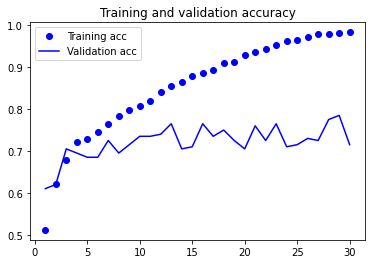

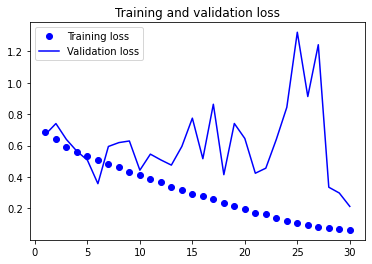

In [17]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
#added just the 'Dropout' to cancel the 'overfitting'
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))  #added just the 'Dropout' to cancel the 'overfitting'
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


In [20]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=32,
                                                        class_mode='binary')

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=20,
                              validation_data=validation_generator,
                              validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/20
100/100 [==============================] - 34s 341ms/step - loss: 0.6921 - acc: 0.5262 - val_loss: 0.6529 - val_acc: 0.5476
Epoch 2/20
100/100 [==============================] - 31s 307ms/step - loss: 0.6764 - acc: 0.5682 - val_loss: 0.6847 - val_acc: 0.6128
Epoch 3/20
100/100 [==============================] - 30s 303ms/step - loss: 0.6591 - acc: 0.6057 - val_loss: 0.5545 - val_acc: 0.6104
Epoch 4/20
100/100 [==============================] - 31s 309ms/step - loss: 0.6506 - acc: 0.6076 - val_loss: 0.6764 - val_acc: 0.6418
Epoch 5/20
100/100 [==============================] - 29s 294ms/step - loss: 0.6374 - acc: 0.6307 - val_loss: 0.5693 - val_acc: 0.6066
Epoch 6/20
100/100 [==============================] - 32s 321ms/step - loss: 0.6274 - acc: 0.6449 - val_loss: 0.4727 - val_acc: 0.6695
Epoch 7/20
100/100 [==============================] - 31s 308ms/step - loss: 0.5999 - acc: 0.6690 - val_lo

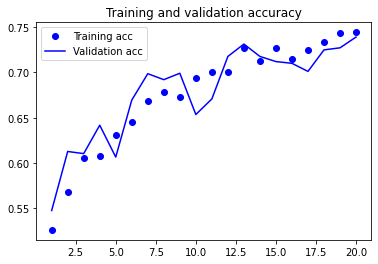

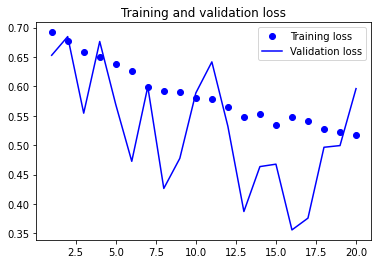

In [21]:
#Plotting after fixing Overfitting
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()